In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [39]:
df = pd.read_csv('../../data/df_clean.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
#df.set_index('date', inplace=True)
df.head()

,date,eurusd,jpyusd,gbpusd,nq,sp500,nikkei,ftse,gdp_us,gdp_uk,...,unrate_uk,unrate_jp,unrate_ez,m0_us,m0_jp,m0_ez,ir_us,ir_uk,ir_ez,ir_jp
0,2004-01-01,1.258194,0.009320,1.785204,1468.0,1111.920044,10676.639648,4476.899902,11923447.0,322790.0,...,4.8,5.1,9.4,736400000.0,1.060327e+09,548711.0,1.0,3.75,2.0,0.1
1,2004-01-02,1.258194,0.009354,1.793690,1466.5,1108.479980,10676.639648,4510.200195,11923447.0,322790.0,...,4.8,5.1,9.4,736400000.0,1.060327e+09,548711.0,1.0,3.75,2.0,0.1
2,2004-01-05,1.268698,0.009413,1.807207,1495.5,1122.219971,10825.169922,4513.299805,11923447.0,322790.0,...,4.8,5.1,9.4,736400000.0,1.060327e+09,548711.0,1.0,3.75,2.0,0.1
3,2004-01-06,1.272103,0.009414,1.821295,1504.5,1123.670044,10813.990234,4505.200195,11923447.0,322790.0,...,4.8,5.1,9.4,736400000.0,1.060327e+09,548711.0,1.0,3.75,2.0,0.1
4,2004-01-07,1.264095,0.009418,1.817785,1517.0,1126.329956,10757.820312,4473.000000,11923447.0,322790.0,...,4.8,5.1,9.4,736400000.0,1.060327e+09,548711.0,1.0,3.75,2.0,0.1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4957 non-null   datetime64[ns]
 1   eurusd     4957 non-null   float64       
 2   jpyusd     4957 non-null   float64       
 3   gbpusd     4957 non-null   float64       
 4   nq         4957 non-null   float64       
 5   sp500      4957 non-null   float64       
 6   nikkei     4957 non-null   float64       
 7   ftse       4957 non-null   float64       
 8   gdp_us     4957 non-null   float64       
 9   gdp_uk     4957 non-null   float64       
 10  gdp_jp     4957 non-null   float64       
 11  gdp_ez     4957 non-null   float64       
 12  unrate_us  4957 non-null   float64       
 13  unrate_uk  4957 non-null   float64       
 14  unrate_jp  4957 non-null   float64       
 15  unrate_ez  4957 non-null   float64       
 16  m0_us      4957 non-null   float64       


In [41]:
null_values = df.isnull().sum()
null_values

date         0
eurusd       0
jpyusd       0
gbpusd       0
nq           0
sp500        0
nikkei       0
ftse         0
gdp_us       0
gdp_uk       0
gdp_jp       0
gdp_ez       0
unrate_us    0
unrate_uk    0
unrate_jp    0
unrate_ez    0
m0_us        0
m0_jp        0
m0_ez        0
ir_us        0
ir_uk        0
ir_ez        0
ir_jp        0
dtype: int64

In [42]:
# Función auxiliar para formatear el eje x
def format_xaxis(ax):
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.figure.autofmt_xdate()

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Create a copy of the original DataFrame
df_normalized = df.copy()

columns_to_scale = df.columns.drop('date')

# Normalizing the selected columns of the copied DataFrame
df_normalized[columns_to_scale] = scaler.fit_transform(df_normalized[columns_to_scale])

# Show the normalized DataFrame
print(df_normalized)


           date    eurusd    jpyusd    gbpusd        nq     sp500    nikkei  \
0    2004-01-01  0.467123  0.406590  0.688066  0.027582  0.105676  0.153362   
1    2004-01-02  0.467123  0.411785  0.696261  0.027485  0.104841  0.153362   
2    2004-01-05  0.483555  0.420799  0.709316  0.029352  0.108176  0.159652   
3    2004-01-06  0.488883  0.420934  0.722921  0.029931  0.108528  0.159178   
4    2004-01-07  0.476354  0.421612  0.719532  0.030736  0.109174  0.156800   
...         ...       ...       ...       ...       ...       ...       ...   
4952 2022-12-26  0.167655  0.133222  0.128686  0.645988  0.768997  0.819428   
4953 2022-12-27  0.163339  0.133447  0.131018  0.635705  0.765218  0.821206   
4954 2022-12-28  0.162861  0.127222  0.125530  0.626517  0.754045  0.816660   
4955 2022-12-29  0.161623  0.122542  0.125642  0.643253  0.770079  0.806208   
4956 2022-12-30  0.166552  0.132131  0.128331  0.642577  0.767706  0.806243   

          ftse  gdp_us  gdp_uk  ...  unrate_uk  unr

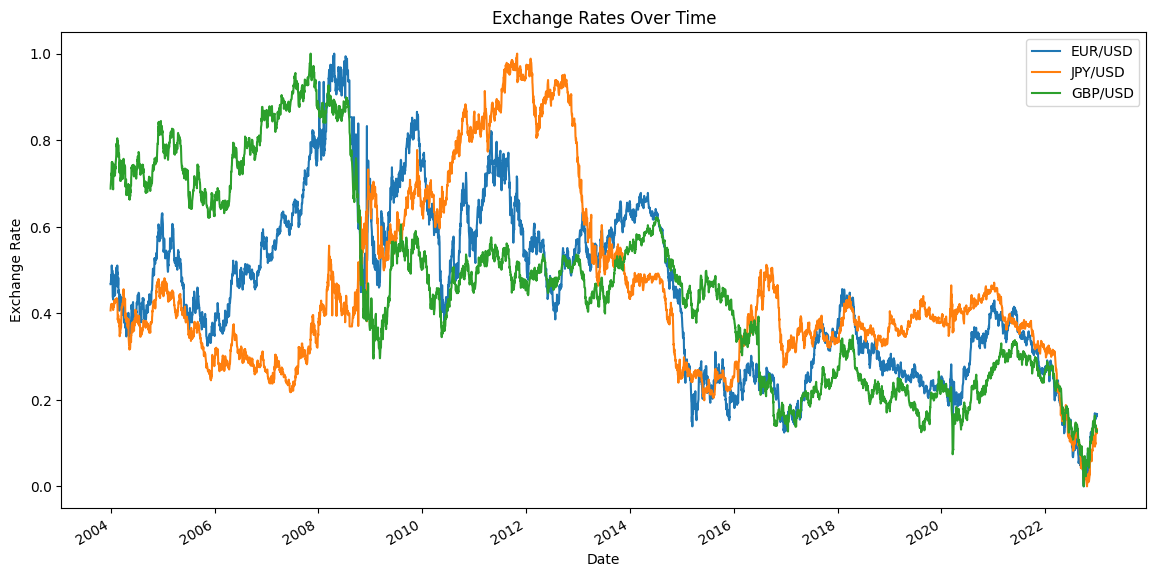

In [44]:
plt.figure(figsize=(14, 7))
plt.plot(df_normalized['date'], df_normalized['eurusd'], label='EUR/USD')
plt.plot(df_normalized['date'], df_normalized['jpyusd'], label='JPY/USD')
plt.plot(df_normalized['date'], df_normalized['gbpusd'], label='GBP/USD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rates Over Time')
plt.legend()
format_xaxis(plt.gca())
plt.show()

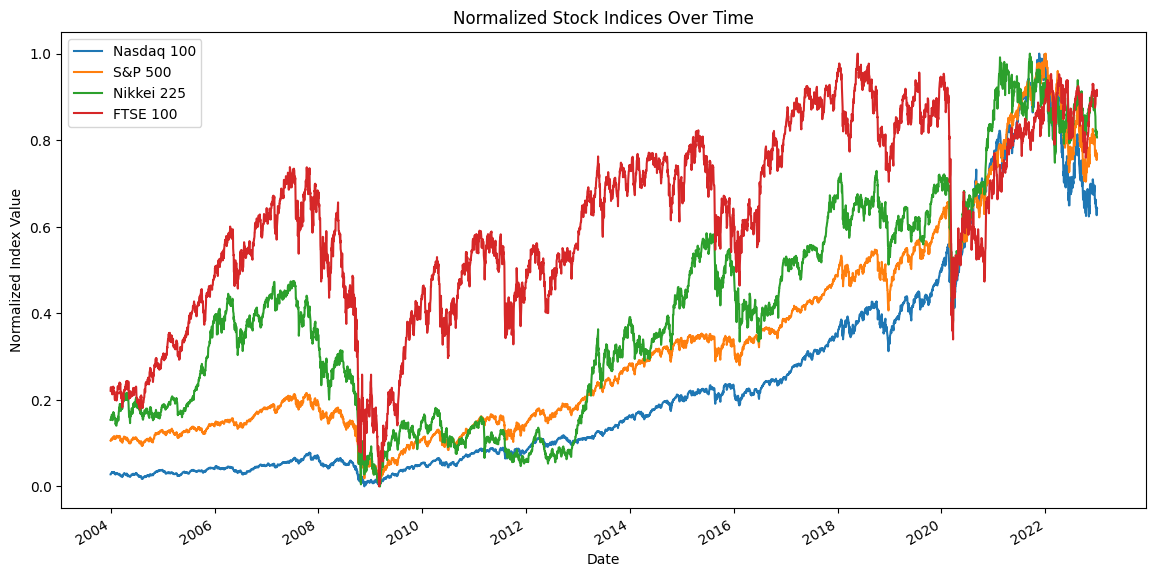

In [45]:
# Graficar el DataFrame normalizado
plt.figure(figsize=(14, 7))
plt.plot(df_normalized['date'], df_normalized['nq'], label='Nasdaq 100')
plt.plot(df_normalized['date'], df_normalized['sp500'], label='S&P 500')
plt.plot(df_normalized['date'], df_normalized['nikkei'], label='Nikkei 225')
plt.plot(df_normalized['date'], df_normalized['ftse'], label='FTSE 100')
plt.xlabel('Date')
plt.ylabel('Normalized Index Value')
plt.title('Normalized Stock Indices Over Time')
plt.legend()
format_xaxis(plt.gca())
plt.show()

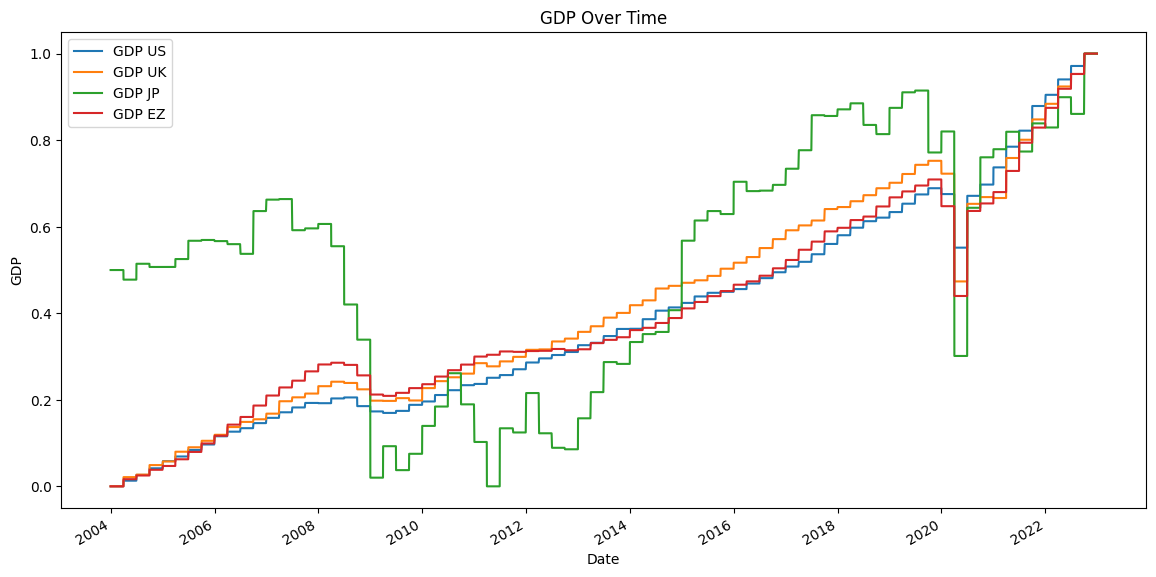

In [46]:
# Celda 10: Visualizar series temporales de PIB de diferentes regiones
plt.figure(figsize=(14, 7))
plt.plot(df_normalized['date'], df_normalized['gdp_us'], label='GDP US')
plt.plot(df_normalized['date'], df_normalized['gdp_uk'], label='GDP UK')
plt.plot(df_normalized['date'], df_normalized['gdp_jp'], label='GDP JP')
plt.plot(df_normalized['date'], df_normalized['gdp_ez'], label='GDP EZ')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()
format_xaxis(plt.gca())
plt.show()

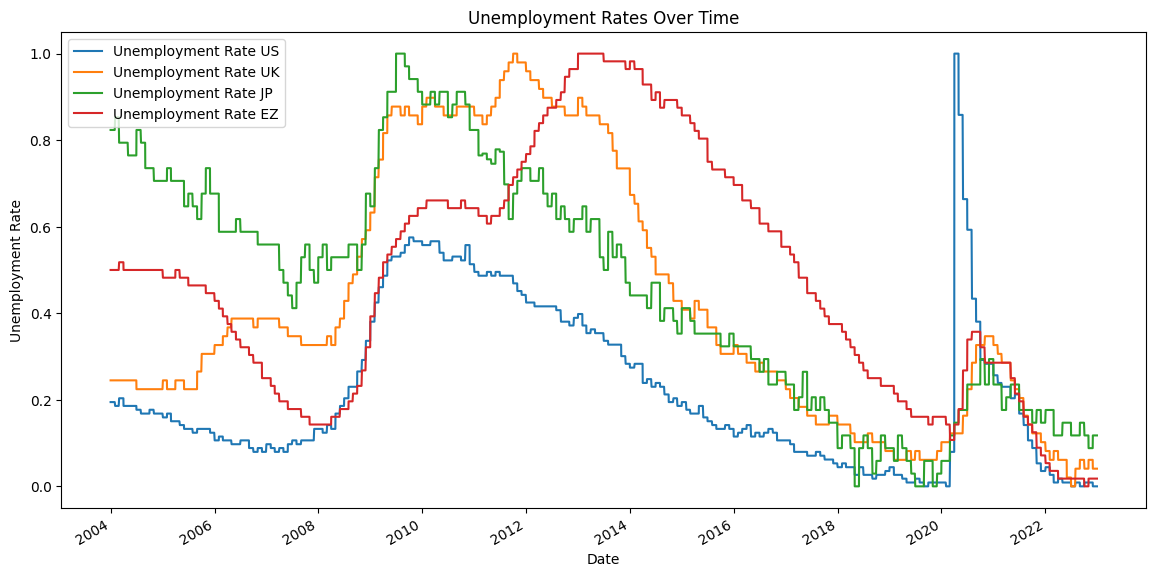

In [47]:
plt.figure(figsize=(14, 7))
plt.plot(df_normalized['date'], df_normalized['unrate_us'], label='Unemployment Rate US')
plt.plot(df_normalized['date'], df_normalized['unrate_uk'], label='Unemployment Rate UK')
plt.plot(df_normalized['date'], df_normalized['unrate_jp'], label='Unemployment Rate JP')
plt.plot(df_normalized['date'], df_normalized['unrate_ez'], label='Unemployment Rate EZ')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rates Over Time')
plt.legend()
format_xaxis(plt.gca())
plt.show()

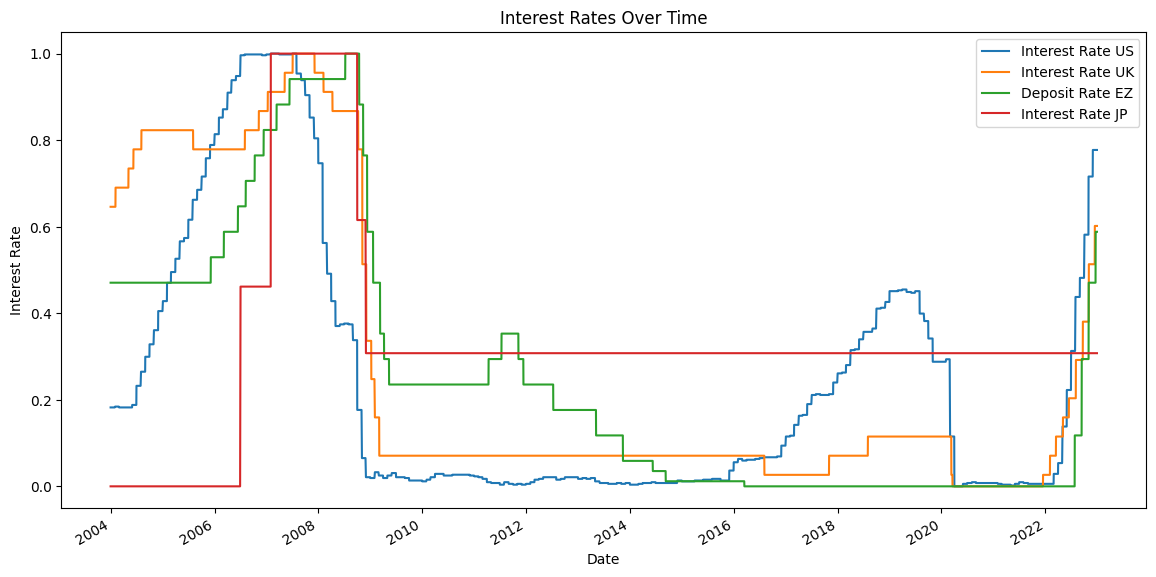

In [49]:
plt.figure(figsize=(14, 7))
plt.plot(df_normalized['date'], df_normalized['ir_us'], label='Interest Rate US')
plt.plot(df_normalized['date'], df_normalized['ir_uk'], label='Interest Rate UK')
plt.plot(df_normalized['date'], df_normalized['ir_ez'], label='Deposit Rate EZ')
plt.plot(df_normalized['date'], df_normalized['ir_jp'], label='Interest Rate JP')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Interest Rates Over Time')
plt.legend()
format_xaxis(plt.gca())
plt.show()

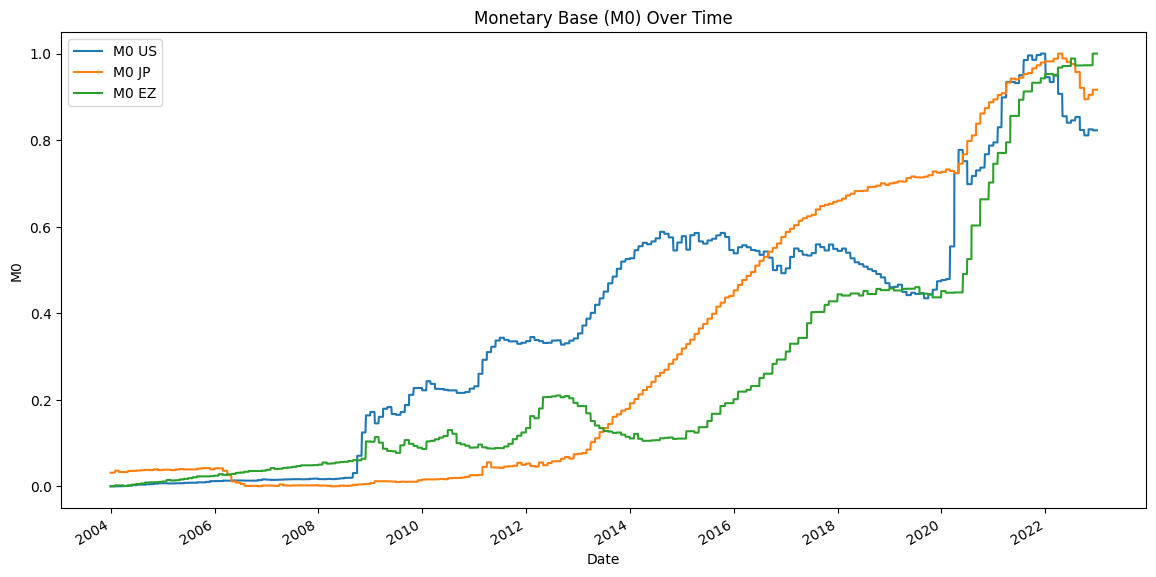

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(df_normalized['date'], df_normalized['m0_us'], label='M0 US')
plt.plot(df_normalized['date'], df_normalized['m0_jp'], label='M0 JP')
plt.plot(df_normalized['date'], df_normalized['m0_ez'], label='M0 EZ')
plt.xlabel('Date')
plt.ylabel('M0')
plt.title('Monetary Base (M0) Over Time')
plt.legend()
format_xaxis(plt.gca())
plt.show()